In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import get_file
import os

In [2]:
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_path = get_file("cats_and_dogs_filtered.zip", origin=dataset_url, extract=True)

base_dir = os.path.join(os.path.dirname(dataset_path), "cats_and_dogs_filtered")
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

print(f"Training Directory: {train_dir}")
print(f"Validation Directory: {validation_dir}")

68606236/68606236 [==============================] - 5s 0us/step
Training Directory: C:\Users\ahmed\.keras\datasets\cats_and_dogs_filtered\train
Validation Directory: C:\Users\ahmed\.keras\datasets\cats_and_dogs_filtered\validation


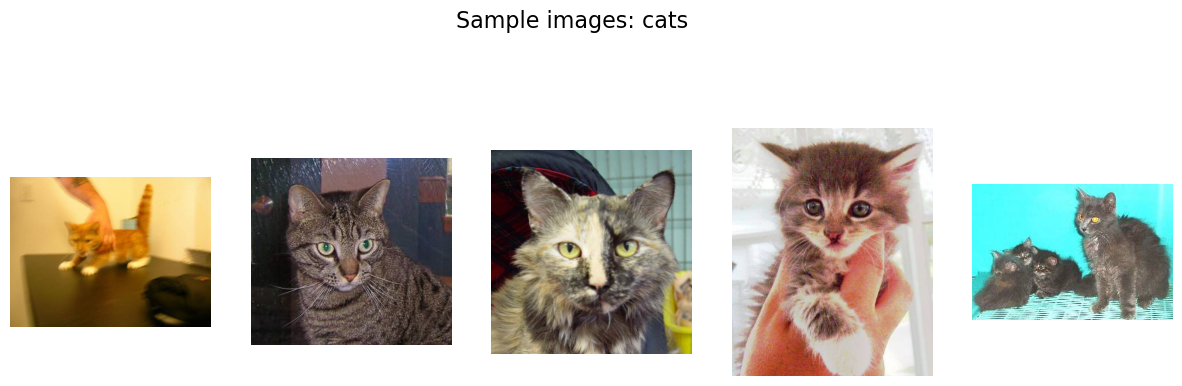

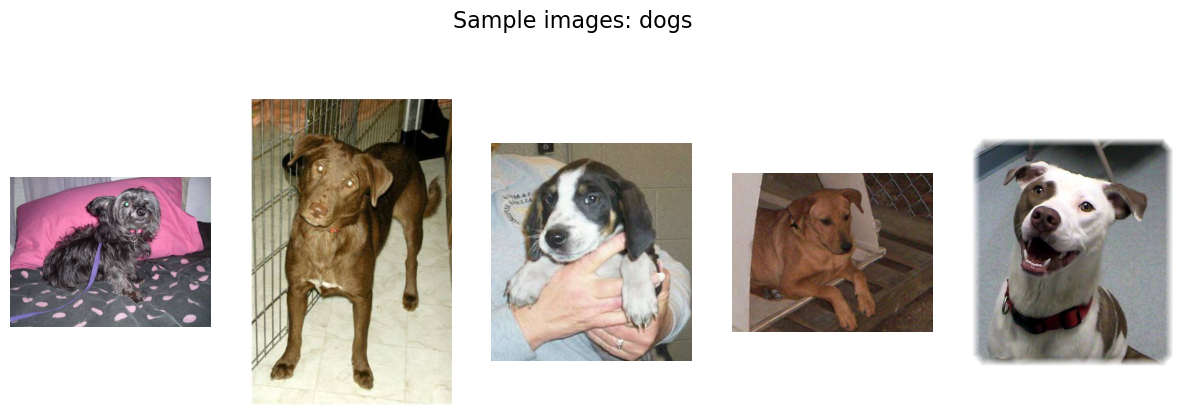

In [3]:
import random
from tensorflow.keras.utils import load_img, img_to_array

def display_sample_images(directory, category):
    category_path = os.path.join(directory, category)
    images = os.listdir(category_path)[:5]
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(category_path, img_name)
        img = load_img(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(f"Sample images: {category}", fontsize=16)
    plt.show()

display_sample_images(train_dir, "cats")
display_sample_images(train_dir, "dogs")

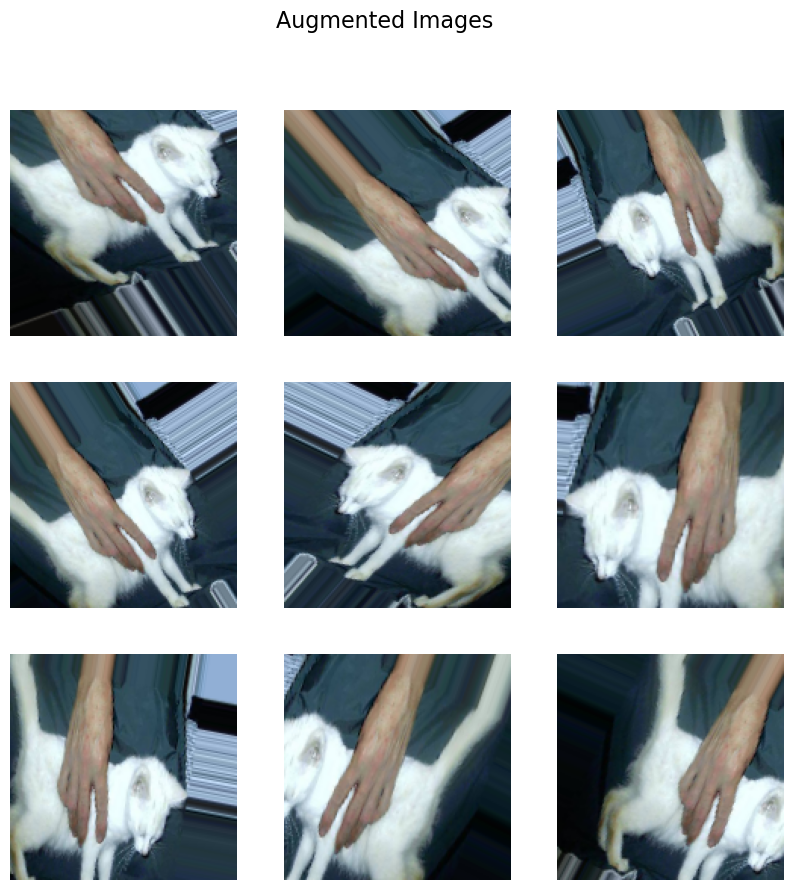

In [4]:
# Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to augment and display images
def augment_and_display(directory, category):
    category_path = os.path.join(directory, category)
    sample_image = random.choice(os.listdir(category_path))
    img_path = os.path.join(category_path, sample_image)

    # Load and preprocess the image
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Generate augmented images
    augmented_images = datagen.flow(img_array, batch_size=1)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        augmented_img = next(augmented_images)[0]
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_img.astype('uint8'))
        plt.axis('off')
    plt.suptitle("Augmented Images", fontsize=16)
    plt.show()

augment_and_display(train_dir, "cats")

In [5]:
# Prepare Augmented Training and Validation Data Generators
batch_size = 32
img_size = (150, 150)

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# Build the CNN model
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (Cats vs Dogs)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [8]:
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
62/62 [==============================] - 83s 1s/step - loss: 0.7013 - accuracy: 0.4883 - val_loss: 0.6923 - val_accuracy: 0.4990
Epoch 2/10
62/62 [==============================] - 53s 858ms/step - loss: 0.6935 - accuracy: 0.4975 - val_loss: 0.6923 - val_accuracy: 0.5071
Epoch 3/10
62/62 [==============================] - 57s 910ms/step - loss: 0.6921 - accuracy: 0.5208 - val_loss: 0.6854 - val_accuracy: 0.6331
Epoch 4/10
62/62 [==============================] - 55s 884ms/step - loss: 0.6861 - accuracy: 0.5503 - val_loss: 0.6819 - val_accuracy: 0.5292
Epoch 5/10
62/62 [==============================] - 54s 860ms/step - loss: 0.6855 - accuracy: 0.5615 - val_loss: 0.6915 - val_accuracy: 0.5252
Epoch 6/10
62/62 [==============================] - 53s 856ms/step - loss: 0.6766 - accuracy: 0.5788 - val_loss: 0.6840 - val_accuracy: 0.5938
Epoch 7/10
62/62 [==============================] - 53s 854ms/step - loss: 0.6769 - accuracy: 0.5737 - val_loss: 0.6290 - val_accuracy: 0.6391
Ep

In [9]:
# Save the trained model
model.save("cats_vs_dogs_cnn_model.h5")


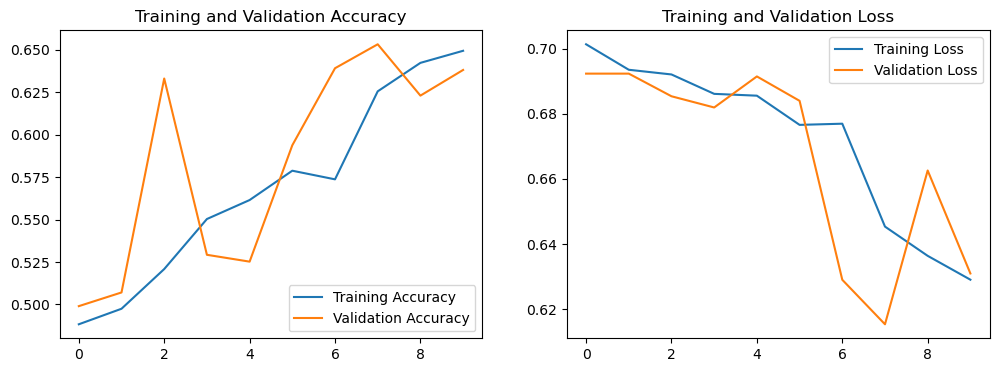

In [10]:
# Evaluate the model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
